In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
cluster1=np.random.normal(5,2,size=(50,2))
cluster2=np.random.normal(15,3,size=(50,2))
cluster3=np.random.normal(8,2,size=(50,2))

dataset=np.concatenate((cluster1,cluster2,cluster3))

In [55]:
class DBSCAN:
    
    def __init__(self,eps=1,min_pts=4):
        
        self.eps=eps
        self.min_pts=min_pts
        self.clusters=[]
        self.noise=[]
     
    def euclidean_distance(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
    
    def get_neighbors(self,dataset,point):
        
        neighbors=[]
        
        for index,candidate in enumerate(dataset):
            if self.euclidean_distance(candidate,point)<self.eps:
                neighbors.append(index)
                    
        return neighbors
    
    def expand_cluster(self,dataset,visited,index,neighbors):
        
        self.clusters.append([index])
        i=0
        
        while i< len(neighbors):
            next_index=neighbors[i]
            if not visited[next_index]:
                visited[next_index]=True
                next_neighbors=self.get_neighbors(dataset,dataset[next_index])
                
                if len(next_neighbors)>=self.min_pts:
                    neighbors+=next_neighbors
                    
            cluster_indices=[i for cluster in self.clusters for i in cluster]
            
            if next_index not in cluster_indices:
                self.clusters[-1].append(next_index)
                
            i=i+1
            
    
    def fit(self,dataset):
        
        visited=[False]*len(dataset)
        
        for index in range(len(dataset)):
            if not visited[index]:
                
                visited[index]=True
                neighbors=self.get_neighbors(dataset,dataset[index])
                
                if len(neighbors)<self.min_pts:  
                    self.noise.append(index)        
                else:  
                    self.expand_cluster(dataset,visited,index,neighbors)
                    
        return self.clusters,self.noise
    
    
    
    def plot(self, dataset):
        
        plt.figure(figsize=(10, 10))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        for i, indices in enumerate(self.clusters):
            points = dataset[indices]
            plt.scatter(points[:, 0], points[:, 1], c=colors[i % len(colors)])
        noise_points = dataset[self.noise]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='black')
        plt.show()

In [57]:
dbscan = DBSCAN(eps=1, min_pts=5)
clusters, noise = dbscan.fit(dataset)

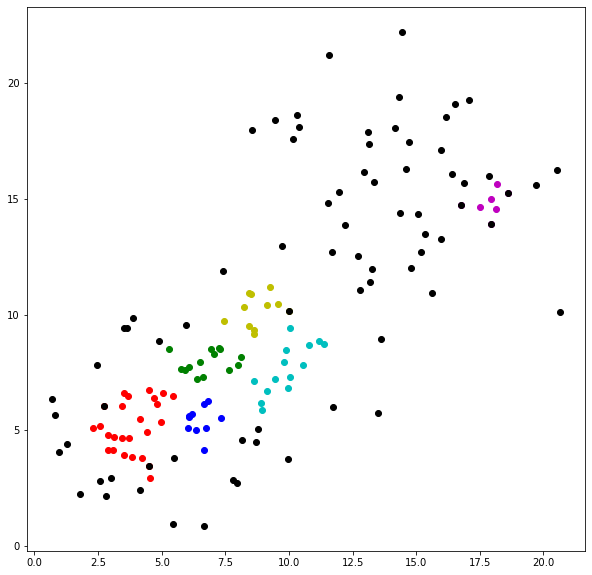

In [58]:
dbscan.plot(dataset)